

## ANALISIS DESCRIPTIVO GENERAL

### Importacion de librerias y apertura de Dataframe

In [1]:
# Importar librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# reset rc params to defaults
sns.reset_orig()

# Importamos un archivo csv a un DataFrame en pandas
df = pd.read_csv('BDTICMODEL.csv', encoding='ISO-8859-1')
df

,des_tamano,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic2_1,tic2_2_1a,tic2_2_1b,tic2_2_1c,...,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c,AÃ±o,Total_Personal,Total_Espec
0,2,3481,0,3481,0,0,1,2,2,1,...,2,2,2,2,2,2,1,2016,2,0
1,0,1200,600,360,240,0,1,1,2,2,...,2,2,1,2,2,2,1,2016,2,0
2,2,4761,4761,0,0,0,1,2,2,1,...,1,1,1,2,2,2,1,2016,8,0
3,2,31598,31598,0,0,0,1,2,1,2,...,2,1,2,2,2,2,1,2016,1,0
4,1,101277,101277,0,0,0,1,2,2,1,...,2,1,2,2,2,2,1,2016,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14024,0,33388,0,33388,0,0,1,2,2,1,...,1,1,1,2,2,1,2,2021,3,0
14025,0,26819,16359,10459,0,0,1,2,2,1,...,2,1,1,1,2,2,1,2021,21,1
14026,1,10506,10506,0,0,0,1,2,2,1,...,2,1,2,2,2,2,1,2021,60,0
14027,0,2182,196,1985,0,0,1,2,2,1,...,2,1,2,2,2,1,2,2021,22,0


### Verificacion de valores nulos, vacios etc

In [2]:
df.isnull().sum()

des_tamano        0
tic1_2            0
tic1_3a           0
tic1_3b           0
tic1_3c           0
tic1_3d           0
tic2_1            0
tic2_2_1a         0
tic2_2_1b         0
tic2_2_1c         0
tic2_3            0
tic2_6a           0
tic2_6b           0
tic2_6c           0
tic2_6d           0
tic2_6f           0
tic2_6g           0
tic2_6h           0
tic2_6i           0
tic2_6k           0
tic2_8            0
tic2_8_2b         0
tic2_8_2c         0
tic3_1            0
tic3_1_2b         0
tic3_1_2c         0
tic3_1_2d         0
tic3_1_2e         0
tic3_1_2f         0
tic3_2            0
tic4_1a           0
tic4_1b           0
tic4_1d           0
tic4_1e           0
tic4_2a           0
tic4_2b           0
tic4_2c           0
tic4_2d           0
tic4_2e           0
tic4_4a           0
tic4_4b           0
tic4_4c           0
tic4_4d           0
tic4_4e           0
tic4_4f           0
tic4_4g           0
tic4_4h           0
tic5_1a           0
tic5_1b           0
tic5_1d           0


### Eliminación de valores nulos, vacios etc

In [3]:
df = df.drop('tic2_1', axis=1)

In [4]:
df = df.drop('AÃ±o', axis=1)

In [5]:
top5_max_valores = df.nlargest(5, 'tic1_2')['tic1_2']
print("Los 5 valores máximos de la columna tic1_2 son:")
print(top5_max_valores)


Los 5 valores máximos de la columna tic1_2 son:
12659    320219142
4770     287990847
7312     156601154
4867     113299216
4860     106365324
Name: tic1_2, dtype: int64


In [6]:
df = df.drop([12659, 4770])

### Analis con estandarizacion RobustScaler

In [7]:
### Creación de grupo con variables numericas
numeric_variables = [
    'tic1_2', 'tic1_3a', 'tic1_3b', 'tic1_3c', 'tic1_3d', 'tic4_1a', 'tic4_1b', 'tic4_1d', 'tic4_1e', 'Total_Personal', 'Total_Espec']


In [8]:
numeric_data = df[numeric_variables]
numeric_data.head()

,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic4_1a,tic4_1b,tic4_1d,tic4_1e,Total_Personal,Total_Espec
0,3481,0,3481,0,0,4,0,0,0,2,0
1,1200,600,360,240,0,4,0,1,1,2,0
2,4761,4761,0,0,0,7,1,7,0,8,0
3,31598,31598,0,0,0,1,0,0,0,1,0
4,101277,101277,0,0,0,36,1,0,0,3,0


In [9]:
from sklearn.preprocessing import RobustScaler # Para escalar
from sklearn.cluster import KMeans # Para los 

In [10]:
RobustScaler = RobustScaler().fit(numeric_data.values)
numeric_data = pd.DataFrame(RobustScaler.transform(numeric_data.values),
                           columns=["tic1_2", "tic1_3a", "tic1_3b", "tic1_3c", "tic1_3d", "tic4_1a", "tic4_1b", "tic4_1d", "tic4_1e",
                                   "Total_Personal", "Total_Espec"])
numeric_data

,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic4_1a,tic4_1b,tic4_1d,tic4_1e,Total_Personal,Total_Espec
0,-0.195108,-0.294830,3481.0,0.0,0.0,-0.40,-0.392857,-0.10,0.0,-0.500000,-0.333333
1,-0.233217,-0.273512,360.0,240.0,0.0,-0.40,-0.392857,-0.05,0.5,-0.500000,-0.333333
2,-0.173723,-0.125671,0.0,0.0,0.0,-0.34,-0.357143,0.25,0.0,-0.466667,-0.333333
3,0.274652,0.827856,0.0,0.0,0.0,-0.46,-0.392857,-0.10,0.0,-0.505556,-0.333333
4,1.438801,3.303571,0.0,0.0,0.0,0.24,-0.357143,-0.10,0.0,-0.494444,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...
14022,0.304558,-0.294830,33388.0,0.0,0.0,-0.42,-0.250000,0.20,0.0,-0.494444,-0.333333
14023,0.194807,0.286410,10459.0,0.0,0.0,-0.48,0.357143,-0.10,0.0,-0.394444,0.000000
14024,-0.077739,0.078451,0.0,0.0,0.0,0.08,-0.321429,-0.10,0.0,-0.177778,-0.333333
14025,-0.216811,-0.287866,1985.0,0.0,0.0,-0.42,-0.321429,-0.05,0.5,-0.388889,-0.333333


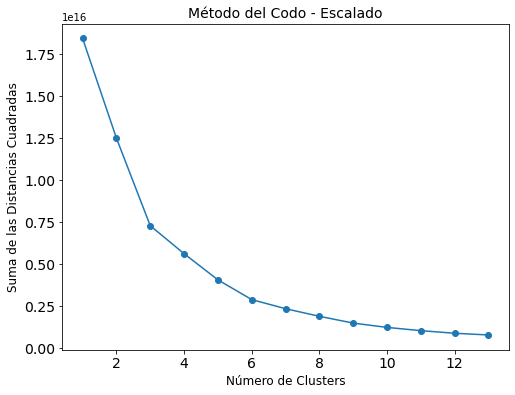

In [11]:
# Cluster metodo de codo ESCALADO
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++', 
                    max_iter=300, 
                    n_init=10, 
                    random_state=42)
    kmeans.fit(numeric_data.values)
    wcss.append(kmeans.inertia_)
    
numero_clusteres = list(enumerate(wcss, start=1))
metrica_wcss = np.array(numero_clusteres)
df_wcss = pd.DataFrame(data=metrica_wcss, columns=['NUM_CLUSTERS', 'ERROR'], index=range(2, 15))

plt.figure(figsize=(8, 6))
plt.plot(df_wcss.NUM_CLUSTERS, df_wcss.ERROR, marker="o")
plt.xlabel('Número de Clusters', fontsize=12)
plt.ylabel('Suma de las Distancias Cuadradas', fontsize=12)
plt.title('Método del Codo - Escalado', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


In [12]:
kmeans = KMeans(n_clusters=2).fit(numeric_data.values)
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
numeric_data["cluster"] = kmeans.labels_
numeric_data

,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic4_1a,tic4_1b,tic4_1d,tic4_1e,Total_Personal,Total_Espec,cluster
0,-0.195108,-0.294830,3481.0,0.0,0.0,-0.40,-0.392857,-0.10,0.0,-0.500000,-0.333333,0
1,-0.233217,-0.273512,360.0,240.0,0.0,-0.40,-0.392857,-0.05,0.5,-0.500000,-0.333333,0
2,-0.173723,-0.125671,0.0,0.0,0.0,-0.34,-0.357143,0.25,0.0,-0.466667,-0.333333,0
3,0.274652,0.827856,0.0,0.0,0.0,-0.46,-0.392857,-0.10,0.0,-0.505556,-0.333333,0
4,1.438801,3.303571,0.0,0.0,0.0,0.24,-0.357143,-0.10,0.0,-0.494444,-0.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14022,0.304558,-0.294830,33388.0,0.0,0.0,-0.42,-0.250000,0.20,0.0,-0.494444,-0.333333,0
14023,0.194807,0.286410,10459.0,0.0,0.0,-0.48,0.357143,-0.10,0.0,-0.394444,0.000000,0
14024,-0.077739,0.078451,0.0,0.0,0.0,0.08,-0.321429,-0.10,0.0,-0.177778,-0.333333,0
14025,-0.216811,-0.287866,1985.0,0.0,0.0,-0.42,-0.321429,-0.05,0.5,-0.388889,-0.333333,0


In [14]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[ 3.25466655e+00  2.78434157e+00  6.52099330e+04  1.38405165e+04
   4.42497445e+04  1.12798460e+00  9.94052713e-01  1.18301241e+00
   3.47036799e+00  8.79655779e-01  1.19512195e+00]
 [ 1.60423315e+03  5.38541908e+02  7.60319536e+07 -1.81898940e-12
   4.83741540e+06  5.11560000e+01  3.81571429e+01 -1.00000000e-01
  -4.44089210e-16  3.23633333e+01  1.13200000e+02]] 1.8415127598308204e+16


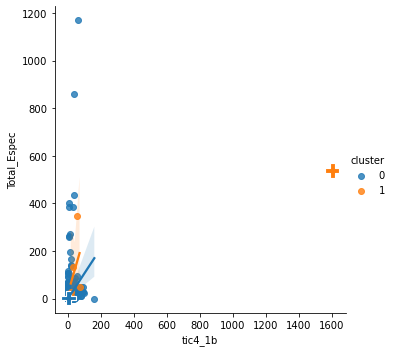

In [15]:
sns.lmplot(x='tic4_1b', y='Total_Espec', data=numeric_data, hue='cluster', palette='tab10')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], hue=range(kmeans.n_clusters), legend=False, palette='tab10', marker='P', s=200)

plt.show()



In [16]:
count_cluster1 = len(numeric_data[numeric_data["cluster"] == 1])
print(count_cluster1)


5


In [17]:
count_cluster1 = len(numeric_data[numeric_data["cluster"] == 0])
print(count_cluster1)


14022


In [18]:
numeric_data.groupby("cluster").mean().round(2)

,tic1_2,tic1_3a,tic1_3b,tic1_3c,tic1_3d,tic4_1a,tic4_1b,tic4_1d,tic4_1e,Total_Personal,Total_Espec
cluster,,,,,,,,,,,
0,3.25,2.78,65209.93,13840.52,44249.74,1.13,0.99,1.18,3.47,0.88,1.2
1,1604.23,538.54,76031953.60,0.00,4837415.40,51.16,38.16,-0.10,0.00,32.36,113.2


De acuerdo a las grafica mostrada, las pequeñas y medianas empresas invierten menos pero tienen mas especialistas, a diferencia de la empresas de gran tamaño que son muy pocas que buscan personal especializado, de acuerdo a nuestras graficas a penas 5 empresas que invierten por sobre la media del total tiene un aproximado de 113 empleados especializados.

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
# cambiar valores de acuerdo al numero de columnas en el dataset
rf.fit(numeric_data.iloc[:, 0:11], numeric_data.iloc[:,11])  

RandomForestClassifier()

Text(0.5, 0, 'Random Forest Feature Importance')

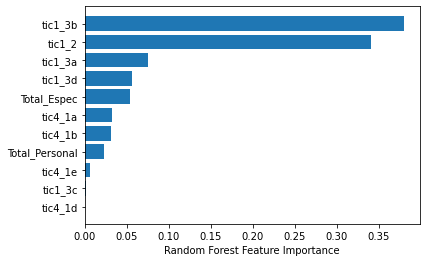

In [20]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(numeric_data.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

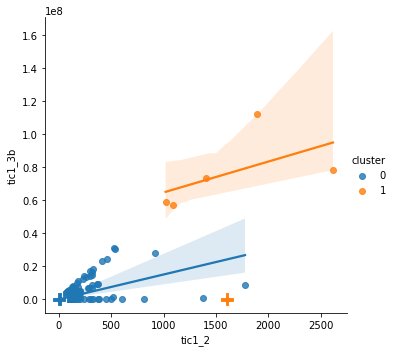

In [21]:
sns.lmplot(x='tic1_2', y='tic1_3b', data=numeric_data, hue='cluster', palette='tab10')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], hue=range(kmeans.n_clusters), legend=False, palette='tab10', marker='P', s=200)

plt.show()

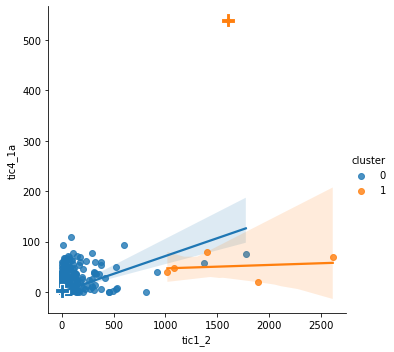

In [22]:
sns.lmplot(x='tic1_2', y='tic4_1a', data=numeric_data, hue='cluster', palette='tab10')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], hue=range(kmeans.n_clusters), legend=False, palette='tab10', marker='P', s=200)

plt.show()

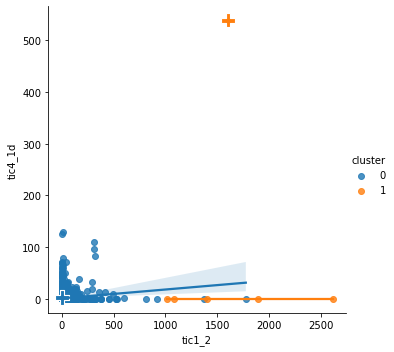

In [23]:
sns.lmplot(x='tic1_2', y='tic4_1d', data=numeric_data, hue='cluster', palette='tab10')
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], hue=range(kmeans.n_clusters), legend=False, palette='tab10', marker='P', s=200)

plt.show()

In [ ]:
plt.figure(figsize=(6,5), dpi=100)
colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range (kmeans.n_clusters):
    plt.scatter(numeric_data[numeric_data["cluster"]==cluster]["tic1_2"],
                numeric_data[numeric_data["cluster"]==cluster]["tic1_3a"],
                numeric_data[numeric_data["cluster"]==cluster]["tic1_3b"],
                numeric_data[numeric_data["cluster"]==cluster]["tic1_3c"],
                numeric_data[numeric_data["cluster"]==cluster]["tic1_3d"],
                numeric_data[numeric_data["cluster"]==cluster]["tic4_1a"],
                numeric_data[numeric_data["cluster"]==cluster]["tic4_1b"],
                numeric_data[numeric_data["cluster"]==cluster]["tic4_1d"],
                numeric_data[numeric_data["cluster"]==cluster]["tic4_1e"],
                numeric_data[numeric_data["cluster"]==cluster]["Total_Personal"],
                numeric_data[numeric_data["cluster"]==cluster]["Total_Espec"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0]),
                kmeans.cluster_centers_[cluster][1],
                marker="P", s=280, color=colores[cluster])
            
plt.title("Innovacion", fontsize = 20)
plt.xlabel("Inversion en Tic (dolares)", fontsize=15)
plt.ylabel("Total Especialistas", fontsize=15)
plt.text(1.15, 0.2, "K = %i" kmeans-n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
plt.show()

del numeric_data["cluster"]

# VARIABLES CATEGORICAS



In [24]:
variables_excluidas = ['tic1_2', 'tic1_3a', 'tic1_3b', 'tic1_3c', 'tic1_3d', 'tic4_1a', 'tic4_1b', 'tic4_1d', 'tic4_1e', 'Total_Personal', 'Total_Espec']
categorical_variables = df.loc[:, ~df.columns.isin(variables_excluidas)]


In [25]:
categorical_variables.head()

,des_tamano,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,tic2_6a,tic2_6b,tic2_6c,tic2_6d,tic2_6f,...,tic4_4h,tic5_1a,tic5_1b,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c
0,2,2,2,1,1,1,1,2,2,2,...,2,1,1,2,2,2,2,2,2,1
1,0,1,2,2,2,1,2,1,1,1,...,1,1,1,2,2,1,2,2,2,1
2,2,2,2,1,2,1,2,1,1,2,...,1,1,1,1,1,1,2,2,2,1
3,2,2,1,2,2,1,2,2,1,1,...,1,1,1,2,1,2,2,2,2,1
4,1,2,2,1,2,1,2,1,1,1,...,1,1,1,2,1,2,2,2,2,1


#  Escalar las variables

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [27]:
escalador = MinMaxScaler().fit(categorical_variables.values)
escalador = MinMaxScaler().fit(categorical_variables.values)
categorical_variables = pd.DataFrame(escalador.transform(categorical_variables.values),
                                     columns=["des_tamano", "tic2_2_1a", "tic2_2_1b", "tic2_2_1c", "tic2_3", "tic2_6a", "tic2_6b", "tic2_6c", "tic2_6d", "tic2_6f", "tic2_6g", "tic2_6h", "tic2_6i", "tic2_6k", "tic2_8", "tic2_8_2b", "tic2_8_2c", "tic3_1", "tic3_1_2b", "tic3_1_2c", "tic3_1_2d", "tic3_1_2e", "tic3_1_2f", "tic3_2", "tic4_2a", "tic4_2b", "tic4_2c", "tic4_2d", "tic4_2e", "tic4_4a", "tic4_4b", "tic4_4c", "tic4_4d", "tic4_4e", "tic4_4f", "tic4_4g", "tic4_4h", "tic5_1a", "tic5_1b", "tic5_1d", "tic5_1f", "tic5_1h", "tic6_1", "tic6_2a", "tic6_2b", "tic6_2c"])
                           
categorical_variables

,des_tamano,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,tic2_6a,tic2_6b,tic2_6c,tic2_6d,tic2_6f,...,tic4_4h,tic5_1a,tic5_1b,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14022,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
14023,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
14024,0.5,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
14025,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


# Aplicacion del metodo codo

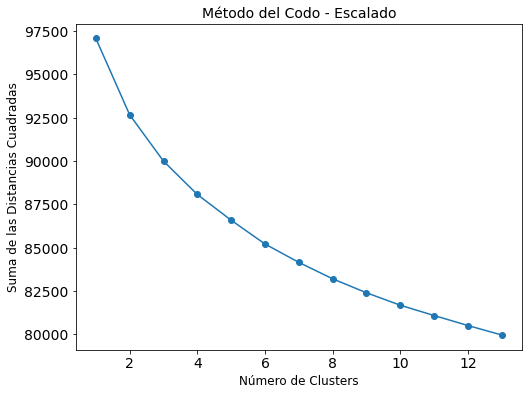

In [28]:
from sklearn.cluster import KMeans
# Cluster metodo de codo
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters   = i, 
                    init         = 'k-means++', 
                    max_iter     = 300, 
                    n_init       = 10, 
                    random_state = 42)
    kmeans.fit(categorical_variables)
    wcss.append(kmeans.inertia_)
    
numero_clusteres = list(enumerate(wcss, start = 1))
metrica_wcss = np.array(numero_clusteres)
df_wcss= pd.DataFrame(data = metrica_wcss, columns = ['NUM_CLUSTERS','ERROR'], index = range(2, 15))

plt.figure(figsize=(8, 6))
plt.plot(df_wcss.NUM_CLUSTERS, df_wcss.ERROR, marker="o")
plt.xlabel('Número de Clusters', fontsize=12)
plt.ylabel('Suma de las Distancias Cuadradas', fontsize=12)
plt.title('Método del Codo - Escalado', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# Aplicacion del metodo kmeans

In [29]:
kmeans = KMeans(n_clusters=2).fit(categorical_variables.values)
kmeans.labels_

array([1, 1, 0, ..., 1, 0, 1])

In [30]:
categorical_variables["cluster"] = kmeans.labels_
categorical_variables

,des_tamano,tic2_2_1a,tic2_2_1b,tic2_2_1c,tic2_3,tic2_6a,tic2_6b,tic2_6c,tic2_6d,tic2_6f,...,tic5_1a,tic5_1b,tic5_1d,tic5_1f,tic5_1h,tic6_1,tic6_2a,tic6_2b,tic6_2c,cluster
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1
2,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0
3,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1
4,0.5,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14022,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0
14023,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1
14024,0.5,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1
14025,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0


In [31]:
print(kmeans.cluster_centers_, kmeans.inertia_)

[[0.09591517 0.87878058 0.89058923 0.05819978 0.31124232 0.00132546
  0.11603808 0.11615857 0.07338234 0.00939872 0.06567056 0.09748162
  0.5287384  0.27581636 0.12158091 0.22942523 0.69309555 0.61645981
  0.77165924 0.74635498 0.7964815  0.8846849  0.88769731 0.50343415
  0.34968068 0.03084709 0.43101579 0.44378841 0.42487047 0.0407278
  0.09989155 0.09013134 0.03253404 0.04217376 0.07229787 0.22990722
  0.16086275 0.02458127 0.05241595 0.57862393 0.16652609 0.37486444
  0.26822509 0.63694421 0.69791541 0.55645258]
 [0.17213687 0.85789106 0.83938547 0.16375698 0.52548883 0.00157123
  0.41829609 0.39594972 0.20356145 0.05185056 0.22276536 0.37517458
  0.83222765 0.7398743  0.39193436 0.27671089 0.91340782 0.86522346
  0.76344274 0.74144553 0.77723464 0.89053771 0.87901536 0.79539106
  0.58414804 0.02688547 0.5109986  0.76361732 0.7601257  0.30062849
  0.47171788 0.44308659 0.33990922 0.38006285 0.50576117 0.73481145
  0.66061453 0.06930866 0.12168296 0.86243017 0.52007682 0.6534567
  0

In [32]:
categorical_variables.groupby("cluster").agg(lambda x: x.mode().iat[0]).round(2).T

cluster,0,1
des_tamano,0.0,0.0
tic2_2_1a,1.0,1.0
tic2_2_1b,1.0,1.0
tic2_2_1c,0.0,0.0
tic2_3,0.0,1.0
tic2_6a,0.0,0.0
tic2_6b,0.0,0.0
tic2_6c,0.0,0.0
tic2_6d,0.0,0.0
tic2_6f,0.0,0.0


In [33]:
import pandas as pd

# Crear un DataFrame con los datos proporcionados
data = {
    'cluster': [0, 1],
    'des_tamano': [0.0, 0.0],
    'tic2_2_1a': [1.0, 1.0],
    'tic2_2_1b': [1.0, 1.0],
    'tic2_2_1c': [0.0, 0.0],
    'tic2_3': [0.0, 0.0],
    'tic2_6a': [0.0, 0.0],
    'tic2_6b': [0.0, 0.0],
    'tic2_6c': [0.0, 0.0],
    'tic2_6d': [0.0, 0.0],
    'tic2_6f': [0.0, 0.0],
    'tic2_6g': [0.0, 0.0],
    'tic2_6h': [0.0, 0.0],
    'tic2_6i': [1.0, 1.0],
    'tic2_6k': [1.0, 0.0],
    'tic2_8': [0.0, 0.0],
    'tic2_8_2b': [0.0, 0.0],
    'tic2_8_2c': [1.0, 1.0],
    'tic3_1': [1.0, 1.0],
    'tic3_1_2b': [1.0, 1.0],
    'tic3_1_2c': [1.0, 1.0],
    'tic3_1_2d': [1.0, 1.0],
    'tic3_1_2e': [1.0, 1.0],
    'tic3_1_2f': [1.0, 1.0],
    'tic3_2': [1.0, 0.0],
    'tic4_2a': [1.0, 0.0],
    'tic4_2b': [0.0, 0.0],
    'tic4_2c': [0.0, 0.0],
    'tic4_2d': [1.0, 0.0],
    'tic4_2e': [1.0, 0.0],
    'tic4_4a': [0.0, 0.0],
    'tic4_4b': [0.0, 0.0],
    'tic4_4c': [0.0, 0.0],
    'tic4_4d': [0.0, 0.0],
    'tic4_4e': [0.0, 0.0],
    'tic4_4f': [0.0, 0.0],
    'tic4_4g': [1.0, 0.0],
    'tic4_4h': [0.0, 0.0],
    'tic5_1a': [0.0, 0.0],
    'tic5_1b': [0.0, 0.0],
    'tic5_1d': [1.0, 1.0],
    'tic5_1f': [0.0, 0.0],
    'tic5_1h': [1.0, 0.0],
    'tic6_1': [1.0, 0.0],
    'tic6_2a': [1.0, 0.0],
    'tic6_2b': [1.0, 0.0],
    'tic6_2c': [0.0, 1.0]
}

df = pd.DataFrame(data)

# Agrupar por la columna "cluster" y aplicar las operaciones deseadas
result = df.groupby("cluster").agg(lambda x: x.mode().iat[0]).round(2)

# Realizar operaciones en el DataFrame resultante
result["Operacion"] = result.sum(axis=1)

# Exportar el resultado a un archivo Excel
result.to_excel("resultado.xlsx", index=False)

# Mostrar el resultado
print(result)


         des_tamano  tic2_2_1a  tic2_2_1b  tic2_2_1c  tic2_3  tic2_6a  \
cluster                                                                 
0               0.0        1.0        1.0        0.0     0.0      0.0   
1               0.0        1.0        1.0        0.0     0.0      0.0   

         tic2_6b  tic2_6c  tic2_6d  tic2_6f  ...  tic5_1a  tic5_1b  tic5_1d  \
cluster                                      ...                              
0            0.0      0.0      0.0      0.0  ...      0.0      0.0      1.0   
1            0.0      0.0      0.0      0.0  ...      0.0      0.0      1.0   

         tic5_1f  tic5_1h  tic6_1  tic6_2a  tic6_2b  tic6_2c  Operacion  
cluster                                                                  
0            0.0      1.0     1.0      1.0      1.0      0.0       21.0  
1            0.0      0.0     0.0      0.0      0.0      1.0       12.0  

[2 rows x 47 columns]


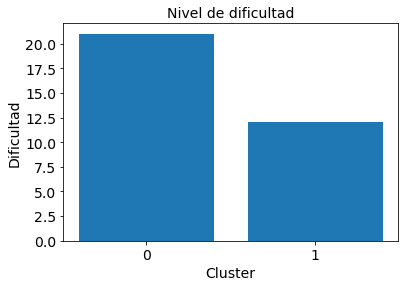

In [34]:
import matplotlib.pyplot as plt

# Datos de la tabla
data = {
    'cluster': [0, 1],
    'Operacion': [21, 12]
}

df = pd.DataFrame(data)

# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots()

# Graficar las barras
ax.bar(df['cluster'], df['Operacion'])

# Establecer etiquetas en el eje x
ax.set_xticks(df['cluster'])

# Agregar etiquetas en el eje x
ax.set_xticklabels(df['cluster'])

# Establecer el título del gráfico y los nombres de los ejes
ax.set_title('Nivel de dificultad', fontsize=14)
ax.set_xlabel('Cluster', fontsize=14)
ax.set_ylabel('Dificultad', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


# Mostrar la figura
plt.show()



# Gracias

# NO EJECUTAR


In [ ]:
# DESCRIPTIVO

# Importamos un archivo csv a un DataFrame en pandas
df = pd.read_csv('BDTIC2.csv', encoding='ISO-8859-1')

# Tipo de dato
print(df.info())

# Transformacion de columna a dato numerico
df['tic1_2'] = pd.to_numeric(df['tic1_2'], errors='coerce').astype('Int64')

# Transformacion de columna a dato categorico
df['tic1_1'] = df['tic1_1'].astype('category')

# Transformacion grupo de columnas a dato categorico

Grupo6 = ['tic6_1', 'tic6_2a', 'tic6_2b', 'tic6_2c']
df[Grupo6] = df[Grupo6].astype('category')


# Sacar la media de una columna y crear una nueva
mean_tic1_3c = df['tic1_3c'].mean()

# Analisis de valores perdidos
pip install missingno
import missingno as msno
msno.bar(df)

# Estadistica descriptiva de columnas numericas
df.describe()

# Formacion de grupos de acuerdo a segmentacion propuesta
df["Inv_Tic"] = df["tic1_1"] + df["tic1_2"] + df["tic1_3a"] + df["tic1_3b"] + df["tic1_3c"] + df["tic1_3d"]


# Analisis por variable

df["tic2_2_1a"].dtype # Tipo de dato

df["tic1_1"].describe()

unique_values = df['tic1_1'].unique() # Ver valores unicos
print(unique_values)

reemplazos = {1: 'Si', 2: 'No'}
df['tic1_1'] = df['tic1_1'].replace(reemplazos)

# Grafico de barras de variables categoricos con conteo en cada columna

sns.countplot(data=df, x="tic2_2_1a")
pd.value_counts(df['tic2_2_1a'])

# Grafico de barras con varibles por año 

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Año", hue="tic1_1", order=sorted(df["Año"].unique()))
plt.title("Valores de Si y No en la columna tic1_1")
plt.xlabel("Año")
plt.ylabel("Inversion en Tic")
pd.value_counts(df['tic1_1'])

# Grafico de cajas

sns.boxplot(data=df, x="des_tamano", y="tic1_3a")
